<a href="https://colab.research.google.com/github/String-ru/AIFFEL_quest_cr/blob/main/1st_datathon_0221_final_9_50AM_1st_assumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# C1 Datathon

# DOTT 팀

# 1st Assumption

#특정 장르에서 특정 배우는 더 높은 선호도를 보일까?

- 장르에 대한 배우 개인의 출연 선호도 X

- 여러 장르에 출연하는 배우에 대한 시청자의 선호도 O

#개요

## 데이터 수집 및 정리:

Google Drive에서 OTT 데이터셋을 불러와 컬럼을 정리하고, 플랫폼 정보를 추가한 후 각 데이터셋의 컬럼 일치 여부, 결측치, 중복 데이터를 확인 및 처리

## 데이터 병합 및 정제:

결측치 처리와 데이터 병합을 통해 최종 데이터셋(약 19,925행, 이후 중복 제거 후 8,804행, 9컬럼)을 생성

##장르 및 카테고리화:

'listed_in' 컬럼에서 42개의 세부 장르를 추출하고, 이를 10개의 대분류 카테고리로 매핑하여 각 영화/TV 프로그램에 우선순위가 높은 대분류(top_category)를 할당

##배우 데이터 확장 및 분석:

'cast' 컬럼을 개별 배우(actor)로 분리한 후, 각 대분류별로 출연 횟수가 많은 상위 배우들을 도출

##별점 데이터 통합:

Disney+, Amazon Prime, Netflix의 크롤링 결과를 통해 수집한 IMDb 평점 데이터를 title을 기준으로 병합하여 각 작품의 별점(rating_star)을 추가

##평점 분석:

등장 횟수 기준 상위 25%의 actor–장르 조합의 평균 평점과 전체 IMDb 평점 평균을 계산하고, 이를 바 차트, 박스 플롯, 산점도를 활용해 시각적으로 비교 분석함으로써 가설(특정 장르에 대한 특정 배우의 선호 경향)이 통계적으로 유의미한지 평가

# 목차

# 1. Data 불러오기

Google Drive 마운트 및 OTT 데이터셋 로드, 컬럼 정리, 플랫폼 정보 추가 완료. ✅

# 2. 모든 dataset에서 column 동일한지 확인

모든 OTT 데이터셋의 컬럼이 동일한지 검증 완료. ✅

# 3. 결측치 확인

각 데이터셋의 결측치 개수 및 비율 확인 완료. ✅

# 4. 중복data 확인

중복 데이터 없음 확인 완료. ✅

# 5. 결측치 처리 및 data 병합

결측치 처리 및 데이터 병합 완료, 최종 데이터 19,925행 10컬럼 생성. ✅

# 6. 중복되는 영화/TV프로그램 제거

중복된 영화/TV 프로그램을 플랫폼 우선순위로 정리하여 중복 제거 완료, 최최종 데이터 8,804행 9컬럼. ✅

# 7. 장르 파악 (listed_in)

'listed_in'에서 장르를 분리하고 출현 빈도 계산 완료, 상위 20개 장르 출력. ✅

# 8. 전체 장르 고유값 파악

'listed_in'에서 고유한 장르 목록 추출 완료. ✅

# 9. 장르 개수 파악 및 대분류 카테고리화

'listed_in'에서 세부 장르를 분리하여 유니크한 장르 42개 추출 완료. ✅

# 10. 10개 대분류 카테고리와 해당 세부 장르 매핑

10개 대분류 카테고리와 세부 장르 매핑 완료. ✅

# 11. 한 영화/TV당 한 장르 배정

각 작품에 대해 가장 우선순위가 높은 카테고리를 top_category 컬럼으로 배정 완료. ✅

# 12. cast 칼럼을 actor 칼럼으로 쪼개기

'cast' 컬럼에서 배우별로 분리해 개별 행으로 확장한 후, 'actor' 컬럼을 생성하고 'cast' 컬럼을 삭제한 데이터프레임을 출력 ✅

# 13. 각 장르별로 상위 배우들을 출력

각 장르(top_category)별 배우 출연 횟수를 계산한 뒤, 출연 횟수가 많은 상위 5명의 배우를 출력 ✅

# 14. 별점 data 출력

disney+, amazon prime, netflix 3사 크롤링 결과 통해 title로 합쳐서 별점 column 추가 ✅

# 15. 등장 횟수 기준 상위권 배우-장르 평균 별점 계산

상위 25% 등장 횟수를 가진 actor–top_category 쌍의 평균 별점(rating_star)을 계산 ✅

# 16. 전체 별점 평균 계산

전체 IMDb 평점의 평균을 계산 ✅

# 17. 분석

바 차트, 박스 플롯, 산점도 기준으로 분석 진행 ✅

# 1. Data 불러오기

Google Drive 마운트 및 OTT 데이터셋 로드, 컬럼 정리, 플랫폼 정보 추가 완료. ✅

In [1]:
# 1️⃣ Google Drive 마운트
from google.colab import drive
drive.mount('/content/drive')

# 2️⃣ 필요한 라이브러리 불러오기
import os
import pandas as pd

# 3️⃣ 데이터 폴더 경로 설정
data_folder = "/content/drive/MyDrive/1st_datathon"  # 폴더 경로

# 4️⃣ 폴더 내의 파일 목록 확인
file_list = os.listdir(data_folder)
print("📂 데이터 폴더 내 파일 목록:", file_list)

# 5️⃣ CSV 파일 경로 설정
disney_file = os.path.join(data_folder, "disney_plus_titles.csv")
amazon_file = os.path.join(data_folder, "amazon_prime_titles.csv")
netflix_file = os.path.join(data_folder, "netflix_titles.csv")

# 6️⃣ pandas로 CSV 파일 로드
disney_df = pd.read_csv(disney_file)
amazon_df = pd.read_csv(amazon_file)
netflix_df = pd.read_csv(netflix_file)

# 7️⃣ 컬럼 이름을 소문자로 통일
netflix_df.columns = netflix_df.columns.str.lower()
amazon_df.columns = amazon_df.columns.str.lower()
disney_df.columns = disney_df.columns.str.lower()

# 8️⃣ 공통 컬럼만 추출 (필요한 컬럼만 남기는 것으로 활용해도 OK)
common_cols = ['show_id', 'type', 'title', 'director', 'cast', 'release_year', 'date_added','listed_in','duration']
netflix_df = netflix_df[common_cols]
amazon_df = amazon_df[common_cols]
disney_df = disney_df[common_cols]

# 9️⃣ 출처 플랫폼 컬럼 추가
netflix_df['platform'] = 'Netflix'
amazon_df['platform'] = 'Amazon'
disney_df['platform'] = 'Disney'

# 🔟 데이터 크기 확인
print("✅ Disney+ 데이터:", disney_df.shape)
print("✅ Amazon Prime 데이터:", amazon_df.shape)
print("✅ Netflix 데이터:", netflix_df.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
📂 데이터 폴더 내 파일 목록: ['disney_plus_titles.csv', 'amazon_prime_titles.csv', 'netflix_titles.csv']
✅ Disney+ 데이터: (1450, 10)
✅ Amazon Prime 데이터: (9668, 10)
✅ Netflix 데이터: (8807, 10)


<ipython-input-1-10468c4c6dc2>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_df['platform'] = 'Amazon'
<ipython-input-1-10468c4c6dc2>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disney_df['platform'] = 'Disney'


=> 각각 1450 / 9668 / 8807개의 항목(영화나 TV쇼 etc.)에 대한 12개의 정보(column) 존재 확인.

# 2. 모든 dataset에서 column 동일한지 확인

모든 OTT 데이터셋의 컬럼이 동일한지 검증 완료. ✅

In [2]:
# 각 데이터프레임의 컬럼 확인
print("🎬 Disney+ 컬럼:", disney_df.columns)
print("🎬 Amazon Prime 컬럼:", amazon_df.columns)
print("🎬 Netflix 컬럼:", netflix_df.columns)

# 모든 데이터셋에서 컬럼이 동일한지 확인
print("✅ 모든 데이터셋의 컬럼 동일 여부:",
      disney_df.columns.equals(amazon_df.columns) and disney_df.columns.equals(netflix_df.columns))

🎬 Disney+ 컬럼: Index(['show_id', 'type', 'title', 'director', 'cast', 'release_year',
       'date_added', 'listed_in', 'duration', 'platform'],
      dtype='object')
🎬 Amazon Prime 컬럼: Index(['show_id', 'type', 'title', 'director', 'cast', 'release_year',
       'date_added', 'listed_in', 'duration', 'platform'],
      dtype='object')
🎬 Netflix 컬럼: Index(['show_id', 'type', 'title', 'director', 'cast', 'release_year',
       'date_added', 'listed_in', 'duration', 'platform'],
      dtype='object')
✅ 모든 데이터셋의 컬럼 동일 여부: True


# 3. 결측치 확인

각 데이터셋의 결측치 개수 및 비율 확인 완료. ✅

In [3]:
# 데이터프레임별 결측치 개수 확인
print("🔍 Disney+ 결측치 개수:\n", disney_df.isnull().sum())
print("\n🔍 Amazon Prime 결측치 개수:\n", amazon_df.isnull().sum())
print("\n🔍 Netflix 결측치 개수:\n", netflix_df.isnull().sum())

# 전체 데이터 중 결측치 비율 확인
print("\n🔎 Disney+ 결측치 비율:\n", (disney_df.isnull().sum() / len(disney_df)) * 100)
print("\n🔎 Amazon Prime 결측치 비율:\n", (amazon_df.isnull().sum() / len(amazon_df)) * 100)
print("\n🔎 Netflix 결측치 비율:\n", (netflix_df.isnull().sum() / len(netflix_df)) * 100)

🔍 Disney+ 결측치 개수:
 show_id           0
type              0
title             0
director        473
cast            190
release_year      0
date_added        3
listed_in         0
duration          0
platform          0
dtype: int64

🔍 Amazon Prime 결측치 개수:
 show_id            0
type               0
title              0
director        2083
cast            1233
release_year       0
date_added      9513
listed_in          0
duration           0
platform           0
dtype: int64

🔍 Netflix 결측치 개수:
 show_id            0
type               0
title              0
director        2634
cast             825
release_year       0
date_added        10
listed_in          0
duration           3
platform           0
dtype: int64

🔎 Disney+ 결측치 비율:
 show_id          0.000000
type             0.000000
title            0.000000
director        32.620690
cast            13.103448
release_year     0.000000
date_added       0.206897
listed_in        0.000000
duration         0.000000
platform         0.0000

# 4. 중복data 확인

중복 데이터 없음 확인 완료. ✅

In [4]:
# 데이터프레임별 중복 데이터 개수 확인
print("📌 Disney+ 중복 데이터 개수:", disney_df.duplicated().sum())
print("📌 Amazon Prime 중복 데이터 개수:", amazon_df.duplicated().sum())
print("📌 Netflix 중복 데이터 개수:", netflix_df.duplicated().sum())

📌 Disney+ 중복 데이터 개수: 0
📌 Amazon Prime 중복 데이터 개수: 0
📌 Netflix 중복 데이터 개수: 0


# 5. 결측치 처리 및 data 병합

결측치 처리 및 데이터 병합 완료, 최종 데이터 19,925행 10컬럼 생성. ✅

In [5]:
# 1️⃣ 결측치 처리
for df in [disney_df, amazon_df, netflix_df]:
    df = df.copy()  # 경고 방지를 위해 복사본 사용

    # 'date_added' 컬럼이 존재하면 삭제
    if 'date_added' in df.columns:
        df = df.drop(columns=['date_added'])

    # 'director'와 'cast'의 결측치를 'Unknown'으로 채우기
    df['director'] = df['director'].fillna('Unknown')
    df['cast'] = df['cast'].fillna('Unknown')

    # 'duration'의 결측치가 3개뿐이므로 해당 행 제거
    df = df.dropna(subset=['duration'])

# 2️⃣ 데이터 병합
combined_df = pd.concat([disney_df, amazon_df, netflix_df], ignore_index=True)

# 확인
print("✅ 최종 데이터 크기:", combined_df.shape)
print(combined_df.head())

✅ 최종 데이터 크기: (19925, 10)
  show_id     type                                             title  \
0      s1    Movie  Duck the Halls: A Mickey Mouse Christmas Special   
1      s2    Movie                            Ernest Saves Christmas   
2      s3    Movie                      Ice Age: A Mammoth Christmas   
3      s4    Movie                        The Queen Family Singalong   
4      s5  TV Show                             The Beatles: Get Back   

                            director  \
0  Alonso Ramirez Ramos, Dave Wasson   
1                        John Cherry   
2                       Karen Disher   
3                    Hamish Hamilton   
4                                NaN   

                                                cast  release_year  \
0  Chris Diamantopoulos, Tony Anselmo, Tress MacN...          2016   
1           Jim Varney, Noelle Parker, Douglas Seale          1988   
2  Raymond Albert Romano, John Leguizamo, Denis L...          2011   
3  Darren Criss, Adam

# 6. 중복되는 영화/TV프로그램 제거

중복된 영화/TV 프로그램을 플랫폼 우선순위로 정리하여 중복 제거 완료, 최최종 데이터 8,804행 9컬럼. ✅

In [6]:
# 중복된 영화/TV 프로그램을 하나만 남기고 삭제
# 우선순위 설정: Netflix > Amazon Prime > Disney+
platform_order = ['Netflix', 'Amazon', 'Disney']

# 중복된 title에 대해 platform 기준으로 우선순위를 적용하여 남길 행을 결정
df_sorted = df.sort_values(by=['title', 'platform'], ascending=[True, True])
df_sorted['platform'] = pd.Categorical(df_sorted['platform'], categories=platform_order, ordered=True)

# 중복된 title을 가진 행에서 platform 순서대로 중복 제거
df_deduplicated = df_sorted.drop_duplicates(subset=['title'], keep='first')

# 결과 확인
print(f'중복 제거 후 데이터 크기: {df_deduplicated.shape}')

중복 제거 후 데이터 크기: (8804, 9)


# 7. 장르 파악 (listed_in)

'listed_in'에서 장르를 분리하고 출현 빈도 계산 완료, 상위 20개 장르 출력. ✅

In [7]:
# 1단계: listed_in 컬럼에서 장르 목록을 추출하여 장르의 출현 빈도 계산하기
# 각 영화/TV 프로그램의 listed_in이 여러 개의 장르를 포함할 수 있으므로, 먼저 이를 분리하고 나열된 장르들을 확인

# 'listed_in' 컬럼에서 장르를 분리하여 나열
all_genres = df_deduplicated['listed_in'].str.split(',').explode().str.strip()

# 장르별 출현 빈도 계산
genre_counts = all_genres.value_counts()

# 결과 확인
print(genre_counts.head(20))  # 상위 20개의 장르를 출력

listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
TV Comedies                  581
Thrillers                    577
Crime TV Shows               470
Kids' TV                     451
Docuseries                   395
Music & Musicals             375
Romantic TV Shows            370
Horror Movies                357
Stand-Up Comedy              343
Reality TV                   255
Name: count, dtype: int64


# 8. 전체 장르 고유값 파악

'listed_in'에서 고유한 장르 목록 추출 완료. ✅

In [8]:
# 1. listed_in 컬럼에 등장하는 고유한 값들을 확인
unique_genres = df_deduplicated['listed_in'].unique()

# 2. 고유한 장르 목록 출력
print(unique_genres)

['Horror Movies, International Movies, Thrillers'
 'Documentaries, International Movies'
 'Dramas, International Movies, Romantic Movies'
 'Comedies, Romantic Movies' 'Documentaries, Sports Movies'
 'Comedies, Dramas, International Movies' 'TV Comedies' 'Comedies'
 'Dramas, International Movies' 'Sports Movies' 'Documentaries'
 'Reality TV' 'Dramas, Romantic Movies'
 'Dramas, Romantic Movies, Sports Movies'
 'Comedies, International Movies, Romantic Movies' 'Action & Adventure'
 'International TV Shows, Romantic TV Shows, TV Dramas'
 'Docuseries, Science & Nature TV'
 'Dramas, International Movies, Sports Movies' 'Movies'
 'British TV Shows, International TV Shows, Reality TV'
 'Dramas, Independent Movies, Sports Movies'
 'International TV Shows, Korean TV Shows, Romantic TV Shows'
 'Horror Movies, International Movies'
 'Horror Movies, Independent Movies, Thrillers'
 'Crime TV Shows, TV Dramas, TV Mysteries' 'Crime TV Shows, Docuseries'
 'Horror Movies, Thrillers' 'Action & Adventure,

# 9. 장르 개수 파악 및 대분류 카테고리화

'listed_in'에서 세부 장르를 분리하여 유니크한 장르 42개 추출 완료. ✅

In [9]:
import re

# 작은따옴표 제거 후, ','로 세부 장르 분리하기
cleaned_genres = []

for genre in unique_genres:
    # 작은따옴표 제거
    genre = genre.replace("'", "")
    # ','로 세부 장르 분리
    cleaned_genres.extend(genre.split(', '))

# 중복 제거 후 유니크한 세부 장르 세기
unique_cleaned_genres = set(cleaned_genres)
num_unique_genres = len(unique_cleaned_genres)


print(f"유니크한 세부 장르의 개수: {num_unique_genres}")
print("유니크한 세부 장르 목록:")
for genre in unique_cleaned_genres:
    print(genre)

유니크한 세부 장르의 개수: 42
유니크한 세부 장르 목록:
Documentaries
Science & Nature TV
TV Mysteries
Romantic TV Shows
Teen TV Shows
Sports Movies
LGBTQ Movies
Crime TV Shows
Independent Movies
Spanish-Language TV Shows
Classic Movies
Kids TV
Comedies
Movies
Music & Musicals
Classic & Cult TV
Thrillers
TV Horror
TV Comedies
Horror Movies
TV Sci-Fi & Fantasy
Sci-Fi & Fantasy
Korean TV Shows
Cult Movies
British TV Shows
TV Action & Adventure
TV Shows
Docuseries
Stand-Up Comedy
International Movies
Faith & Spirituality
International TV Shows
Anime Features
Stand-Up Comedy & Talk Shows
TV Dramas
TV Thrillers
Dramas
Children & Family Movies
Reality TV
Action & Adventure
Anime Series
Romantic Movies


# 10. 10개 대분류 카테고리와 해당 세부 장르 매핑

10개 대분류 카테고리와 세부 장르 매핑 완료. ✅

In [15]:
genre_mapping = {
    'Action': [
        'Action & Adventure', 'TV Action & Adventure'  # 2개
    ],
    'Crime': [
        'Crime TV Shows', 'TV Mysteries'  # 2개
    ],
    'Sci-Fi/Fantasy': [
        'Sci-Fi & Fantasy', 'TV Sci-Fi & Fantasy', 'Anime Features', 'Anime Series', 'TV Sci-Fi & Fantasy'  # 5개
    ],
    'Comedy': [
        'Stand-Up Comedy', 'TV Comedies', 'Comedies', 'Stand-Up Comedy & Talk Shows', 'Anime Series'  # 5개
    ],
    'Horror/Thriller': [
        'TV Horror', 'Horror Movies', 'TV Thrillers', 'Thrillers', 'TV Action & Adventure', 'Cult Movies'  # 6개
    ],
    'War': [
        'War Movies'  # 1개
    ],
    'Sports': [
        'Sports Movies', 'Reality TV'  # 2개
    ],
    'Music/Musical': [
        'Music & Musicals', 'Stand-Up Comedy & Talk Shows'  # 2개
    ],
    'Romance/Love': [
        'Romantic TV Shows', 'Romantic Movies', 'Dramas'  # 3개
    ],
    'Classic': [
        'Documentaries', 'Docuseries', 'Korean TV Shows', 'Movies', 'Science & Nature TV',
        'Independent Movies', 'Classic Movies', 'Kids TV', 'Teen TV Shows', 'British TV Shows',
        'LGBTQ Movies', 'Classic & Cult TV', 'TV Dramas', 'Faith & Spirituality',
        'Spanish-Language TV Shows', 'International TV Shows', 'International Movies', 'Children & Family Movies', 'TV Shows'
    ]
}

# 각 대분류 장르별 소분류 개수 확인
total_subgenres = 0
for category, subgenres in genre_mapping.items():
    print(f"{category}: {len(subgenres)} 개")

    total_subgenres += len(subgenres)

print(f"\n전체 소분류 장르 개수: {total_subgenres} 개")

Action: 2 개
Crime: 2 개
Sci-Fi/Fantasy: 5 개
Comedy: 5 개
Horror/Thriller: 6 개
War: 1 개
Sports: 2 개
Music/Musical: 2 개
Romance/Love: 3 개
Classic: 19 개

전체 소분류 장르 개수: 47 개


# 11. 한 영화/TV당 한 장르 배정

각 작품에 대해 가장 우선순위가 높은 카테고리를 top_category 컬럼으로 배정 완료. ✅

In [18]:
import pandas as pd
from collections import Counter
from IPython.display import display

# 🎯 listed_in을 대분류로 변환하는 함수
def map_genres_to_categories(listed_in, genre_mapping):
    listed_in = listed_in.replace("'", "")  # 작은따옴표 제거
    categories = [category for category, genres in genre_mapping.items() if any(genre in listed_in for genre in genres)]
    return ', '.join(categories) if categories else ''

# 🎯 df_deduplicated에 대분류 컬럼 추가
df_deduplicated['category'] = df_deduplicated['listed_in'].apply(lambda x: map_genres_to_categories(x, genre_mapping))

# 🎯 각 작품의 category를 리스트로 변환 (대분류 기준)
df_deduplicated["category_list"] = df_deduplicated["category"].apply(lambda x: x.split(", ") if x else [])

# 🎯 모든 대분류 카테고리의 빈도수 계산
all_categories = [cat for sublist in df_deduplicated["category_list"] for cat in sublist]
category_counts = Counter(all_categories)

# 🎯 가장 많이 등장하는 대분류 우선 배정
def get_top_category(categories):
    sorted_categories = sorted(categories, key=lambda x: category_counts[x], reverse=True)
    return sorted_categories[0] if sorted_categories else None

df_deduplicated["top_category"] = df_deduplicated["category_list"].apply(get_top_category)

# 🎯 결과 확인
print(df_deduplicated[["title", "category", "top_category"]])
display(df_deduplicated.head(20))

                              title                                category  \
2036                         #Alive                Horror/Thriller, Classic   
2304  #AnneFrank - Parallel Stories                                 Classic   
2481              #FriendButMarried                   Romance/Love, Classic   
2324            #FriendButMarried 2                   Romance/Love, Classic   
5973                          #Roxy           Comedy, Romance/Love, Classic   
...                             ...                                     ...   
6177                       忍者ハットリくん         Sci-Fi/Fantasy, Comedy, Classic   
4914                           海的儿子                   Romance/Love, Classic   
7101                           마녀사냥          Comedy, Music/Musical, Classic   
5022                        반드시 잡는다  Horror/Thriller, Romance/Love, Classic   
7108            최강전사 미니특공대 : 영웅의 탄생                                 Classic   

     top_category  
2036      Classic  
2304      C

,show_id,type,title,director,cast,release_year,listed_in,duration,platform,category,category_list,top_category
2036,s2037,Movie,#Alive,Cho Il,"Yoo Ah-in, Park Shin-hye",2020,"Horror Movies, International Movies, Thrillers",99 min,Netflix,"Horror/Thriller, Classic","[Horror/Thriller, Classic]",Classic
2304,s2305,Movie,#AnneFrank - Parallel Stories,"Sabina Fedeli, Anna Migotto","Helen Mirren, Gengher Gatti",2019,"Documentaries, International Movies",95 min,Netflix,Classic,[Classic],Classic
2481,s2482,Movie,#FriendButMarried,Rako Prijanto,"Adipati Dolken, Vanesha Prescilla, Rendi Jhon,...",2018,"Dramas, International Movies, Romantic Movies",102 min,Netflix,"Romance/Love, Classic","[Romance/Love, Classic]",Classic
2324,s2325,Movie,#FriendButMarried 2,Rako Prijanto,"Adipati Dolken, Mawar de Jongh, Sari Nila, Von...",2020,"Dramas, International Movies, Romantic Movies",104 min,Netflix,"Romance/Love, Classic","[Romance/Love, Classic]",Classic
5973,s5974,Movie,#Roxy,Michael Kennedy,"Jake Short, Sarah Fisher, Booboo Stewart, Dann...",2018,"Comedies, Romantic Movies",105 min,Netflix,"Comedy, Romance/Love, Classic","[Comedy, Romance/Love, Classic]",Classic
5695,s5696,Movie,#Rucker50,Robert McCullough Jr.,Unknown,2016,"Documentaries, Sports Movies",56 min,Netflix,"Sports, Classic","[Sports, Classic]",Classic
654,s655,Movie,#Selfie,Cristina Jacob,"Flavia Hojda, Crina Semciuc, Olimpia Melinte, ...",2014,"Comedies, Dramas, International Movies",125 min,Netflix,"Comedy, Romance/Love, Classic","[Comedy, Romance/Love, Classic]",Classic
655,s656,Movie,#Selfie 69,Cristina Jacob,"Maia Morgenstern, Olimpia Melinte, Crina Semci...",2016,"Comedies, Dramas, International Movies",119 min,Netflix,"Comedy, Romance/Love, Classic","[Comedy, Romance/Love, Classic]",Classic
2666,s2667,TV Show,#blackAF,Unknown,"Kenya Barris, Rashida Jones, Iman Benson, Genn...",2020,TV Comedies,1 Season,Netflix,Comedy,[Comedy],Comedy
5972,s5973,Movie,#cats_the_mewvie,Michael Margolis,Unknown,2020,"Documentaries, International Movies",90 min,Netflix,Classic,[Classic],Classic


# 12. cast 칼럼을 actor 칼럼으로 쪼개기

'cast' 컬럼에서 배우별로 분리해 개별 행으로 확장한 후, 'actor' 컬럼을 생성하고 'cast' 컬럼을 삭제한 데이터프레임을 출력 ✅

In [19]:
import pandas as pd
from IPython.display import display

# 3️⃣ 배우 데이터 정리: 'cast' 컬럼에서 배우별로 분리하여 개별 행으로 확장

# df_deduplicated_2를 df_deduplicated의 복사본으로 생성
df_deduplicated_2 = df_deduplicated.copy()

# 'cast' 컬럼에서 쉼표로 구분된 배우들을 분리하여 리스트로 만듦
df_deduplicated_2['actor'] = df_deduplicated_2['cast'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])

# 'actor'를 기준으로 explode()하여 각 배우가 한 행을 차지하도록 만듦
df_deduplicated_2 = df_deduplicated_2.explode('actor').reset_index(drop=False)

# 'actor' 컬럼이 생성된 후 'cast'는 더 이상 필요 없으므로 삭제
df_deduplicated_2 = df_deduplicated_2.drop(columns=['cast'])

# 결과를 표 형식으로 보기 좋게 출력
# 'index'를 포함시키기 위해 reset_index(drop=False)로 변경
display(df_deduplicated_2[['index', 'show_id', 'type', 'title', 'director', 'actor', 'release_year', 'listed_in', 'duration', 'platform', 'category', 'category_list', 'top_category']].tail(20))

,index,show_id,type,title,director,actor,release_year,listed_in,duration,platform,category,category_list,top_category
64928,4667,s4668,Movie,​​Kuch Bheege Alfaaz,Onir,Saheb Bhattacharjee,2018,"Dramas, Independent Movies, International Movies",110 min,Netflix,"Romance/Love, Classic","[Romance/Love, Classic]",Classic
64929,4667,s4668,Movie,​​Kuch Bheege Alfaaz,Onir,Shefali Chauhan,2018,"Dramas, Independent Movies, International Movies",110 min,Netflix,"Romance/Love, Classic","[Romance/Love, Classic]",Classic
64930,6177,s6178,TV Show,忍者ハットリくん,Unknown,Unknown,2012,"Anime Series, Kids' TV",2 Seasons,Netflix,"Sci-Fi/Fantasy, Comedy, Classic","[Sci-Fi/Fantasy, Comedy, Classic]",Classic
64931,4914,s4915,TV Show,海的儿子,Unknown,Li Nanxing,2016,"International TV Shows, TV Dramas",1 Season,Netflix,"Romance/Love, Classic","[Romance/Love, Classic]",Classic
64932,4914,s4915,TV Show,海的儿子,Unknown,Christopher Lee,2016,"International TV Shows, TV Dramas",1 Season,Netflix,"Romance/Love, Classic","[Romance/Love, Classic]",Classic
64933,4914,s4915,TV Show,海的儿子,Unknown,Jesseca Liu,2016,"International TV Shows, TV Dramas",1 Season,Netflix,"Romance/Love, Classic","[Romance/Love, Classic]",Classic
64934,4914,s4915,TV Show,海的儿子,Unknown,Apple Hong,2016,"International TV Shows, TV Dramas",1 Season,Netflix,"Romance/Love, Classic","[Romance/Love, Classic]",Classic
64935,4914,s4915,TV Show,海的儿子,Unknown,Jeanette Aw,2016,"International TV Shows, TV Dramas",1 Season,Netflix,"Romance/Love, Classic","[Romance/Love, Classic]",Classic
64936,7101,s7102,TV Show,마녀사냥,Unknown,Si-kyung Sung,2015,"International TV Shows, Korean TV Shows, Stand...",1 Season,Netflix,"Comedy, Music/Musical, Classic","[Comedy, Music/Musical, Classic]",Classic
64937,7101,s7102,TV Show,마녀사냥,Unknown,Se-yoon Yoo,2015,"International TV Shows, Korean TV Shows, Stand...",1 Season,Netflix,"Comedy, Music/Musical, Classic","[Comedy, Music/Musical, Classic]",Classic


# 13. 각 장르별로 상위 배우들을 출력

각 장르(top_category)별 배우 출연 횟수를 계산한 뒤, 출연 횟수가 많은 상위 5명의 배우를 출력 ✅

In [21]:
# 필요한 라이브러리 불러오기
import pandas as pd

# top_category 별로 배우 출연 횟수 계산
actor_counts_by_genre = df_deduplicated_2.groupby(['top_category', 'actor']).size().reset_index(name='actor_count')

# 각 장르별로 배우 출연 횟수를 내림차순으로 정렬
actor_counts_by_genre_sorted = actor_counts_by_genre.sort_values(['top_category', 'actor_count'], ascending=[True, False])

# 각 장르별로 상위 N명 배우를 출력 (여기서는 상위 5명을 예시로 출력)
top_n = 5  # 상위 N명의 배우를 선택할 수 있음
top_actors_per_genre = actor_counts_by_genre_sorted.groupby('top_category').head(top_n)

# 결과를 보기 좋게 출력
# 각 장르별로 상위 배우들을 출력
for genre in top_actors_per_genre['top_category'].unique():
    print(f"\n장르: {genre}")
    display(top_actors_per_genre[top_actors_per_genre['top_category'] == genre][['actor', 'actor_count']])


장르: Action


,actor,actor_count
183,Bruce Willis,9
486,Frank Grillo,7
1182,Pierce Brosnan,7
762,Judi Dench,6
1098,Nicolas Cage,6



장르: Classic


,actor,actor_count
32698,Unknown,783
4184,Anupam Kher,41
16699,Julie Tejwani,33
29307,Shah Rukh Khan,32
31251,Takahiro Sakurai,32



장르: Comedy


,actor,actor_count
34806,Adam Sandler,12
35478,Fortune Feimster,11
35301,David Spade,10
36409,Mike Epps,10
35758,Jeff Dunham,9



장르: Horror/Thriller


,actor,actor_count
37908,Nicolas Cage,4
37888,Morgan Freeman,3
37214,Alison Pill,2
37215,Ally Ioannides,2
37248,Armin Mueller-Stahl,2



장르: Music/Musical


,actor,actor_count
38154,Barbra Streisand,1
38155,Ben Platt,1
38156,Bob van der Palen,1
38157,Bruce Springsteen,1
38158,Carlos Antunes,1



장르: Romance/Love


,actor,actor_count
39175,James Franco,6
39280,Jessica Chastain,6
38285,Amy Adams,5
38359,Anthony Mackie,5
38757,David Oyelowo,5



장르: Sci-Fi/Fantasy


,actor,actor_count
40760,Minako Kotobuki,2
40736,Aki Toyosaki,1
40737,Akira Emoto,1
40738,Anne Watanabe,1
40739,Asami Sanada,1



장르: Sports


,actor,actor_count
40936,Unknown,31
40907,Rutledge Wood,4
40841,Hunter March,3
40777,Adriano Zumbo,2
40803,Candace Nelson,2


In [22]:
print(top_actors_per_genre['top_category'].unique())

['Action' 'Classic' 'Comedy' 'Horror/Thriller' 'Music/Musical'
 'Romance/Love' 'Sci-Fi/Fantasy' 'Sports']


# 14. 별점 data 출력

disney+, amazon prime, netflix 3사 크롤링 결과 통해 title로 합쳐서 별점 column 추가 ✅

In [26]:
import pandas as pd
from google.colab import drive

# 1. 구글 드라이브 마운트
drive.mount('/content/drive')

# 2. 평점 데이터 불러오기
netflix_imdb_df = pd.read_csv('/content/drive/MyDrive/netflix_with_imdb.csv')
disney_imdb_df = pd.read_csv('/content/drive/MyDrive/disney_with_imdb.csv')

# 3. 두 IMDb 데이터셋을 합치기
imdb_combined_df = pd.concat([netflix_imdb_df, disney_imdb_df], ignore_index=True)

# 4. df_deduplicated_2의 title 컬럼을 기준으로 딕셔너리 생성
title_dict = {title: {} for title in df_deduplicated_2['title'].unique()}

# 5. rating_star 컬럼 추가 및 기본값 'unknown' 설정
df_deduplicated_2['rating_star'] = 'unknown'

# 6. IMDb 데이터와 df_deduplicated_2의 title을 비교하여 동일한 title만 반영
matched_titles = imdb_combined_df[imdb_combined_df['title'].isin(df_deduplicated_2['title'])]

# 7. df_deduplicated_2와 matched_titles를 title 기준으로 병합하여 rating_star 채우기
df_deduplicated_2 = df_deduplicated_2.merge(matched_titles[['title', 'imdb_rating']], on='title', how='left')

# 8. imdb_rating 값이 존재하면 해당 값으로, 없으면 'unknown' 유지
df_deduplicated_2['rating_star'] = df_deduplicated_2['imdb_rating'].fillna('unknown')

# 9. 불필요한 imdb_rating 컬럼 삭제
df_deduplicated_2.drop(columns=['imdb_rating'], inplace=True)

# 결과 확인 (샘플 출력)
df_deduplicated_2[['title', 'rating_star']].sample(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,title,rating_star
52811,The Get Down,unknown
3055,Alaska Is a Drag,6.6
44070,Saheb Biwi Aur Gangster Returns,6.7
34265,Mobile Suit Gundam: Char's Counterattack,unknown
2720,Afterlife of the Party,5.8
24123,Humpty Sharma Ki Dulhania,6.0
27012,Just Say Yes,4.6
18644,Forest of Piano,unknown
63684,White Island,4.2
64861,Yowamushi Pedal,unknown


# 15. 등장 횟수 기준 상위권 배우-장르 평균 별점 계산

상위 25% 등장 횟수를 가진 actor–top_category 쌍의 평균 별점(rating_star)을 계산 ✅

In [30]:
import pandas as pd

# 1️⃣ actor~top_category 쌍의 등장 횟수 계산
actor_category_counts = df_deduplicated_2.groupby(['actor', 'top_category']).size().reset_index(name='count')

# 2️⃣ 등장 횟수 기준 상위 25%를 필터링
threshold = actor_category_counts['count'].quantile(0.75)  # 상위 25% 기준값
top_25_percent = actor_category_counts[actor_category_counts['count'] >= threshold]

# 3️⃣ rating_star의 평균 계산
# top_25_percent 데이터셋을 원본 데이터(df_deduplicated_2)와 병합하여 rating_star 값 가져오기
top_25_with_ratings = top_25_percent.merge(df_deduplicated_2, on=['actor', 'top_category'], how='left')

# rating_star 컬럼을 숫자로 변환 (unknown 값은 제외)
top_25_with_ratings = top_25_with_ratings[top_25_with_ratings['rating_star'] != 'unknown']
top_25_with_ratings['rating_star'] = pd.to_numeric(top_25_with_ratings['rating_star'])

# actor~top_category 쌍 별 평균 별점 계산
average_ratings_top_25 = top_25_with_ratings.groupby(['actor', 'top_category'])['rating_star'].mean().reset_index()

# 결과 확인
display(average_ratings_top_25.head(10))

,actor,top_category,rating_star
0,'Najite Dede,Classic,6.300000
1,50 Cent,Action,7.166667
2,50 Cent,Romance/Love,6.200000
3,A.J. Cook,Classic,6.200000
4,A.J. LoCascio,Classic,5.700000
5,A.K. Hangal,Classic,7.250000
6,ARAH,Classic,7.300000
7,Aadarsh Balakrishna,Classic,7.100000
8,Aaditi Pohankar,Classic,6.100000
9,Aadukalam Naren,Classic,8.200000


# 16. 전체 별점 평균 계산

전체 IMDb 평점의 평균을 계산 ✅

In [31]:
# 1️⃣ 두 데이터셋 합치기
combined_imdb_df = pd.concat([netflix_imdb_df[['title', 'imdb_rating']], disney_imdb_df[['title', 'imdb_rating']]], ignore_index=True)

# 2️⃣ 결측치가 있는 행은 제거 (imdb_rating이 없는 영화는 제외)
combined_imdb_df = combined_imdb_df.dropna(subset=['imdb_rating'])

# 3️⃣ imdb_rating 컬럼을 숫자형으로 변환
combined_imdb_df['imdb_rating'] = pd.to_numeric(combined_imdb_df['imdb_rating'])

# 4️⃣ imdb_rating의 평균 계산
average_imdb_rating = combined_imdb_df['imdb_rating'].mean()

# 결과 확인
print(f"전체 imdb_rating의 평균: {average_imdb_rating}")

전체 imdb_rating의 평균: 6.366152727272728


# 만약 상위 25% 조합의 평점이 전체 평균보다 높다면,
# 특정 장르와 배우의 조합이 콘텐츠의 성공에 긍정적 영향을 미친다는 설득력 있는 결론

# 17. 분석

바 차트, 박스 플롯, 산점도 기준으로 분석 진행 ✅

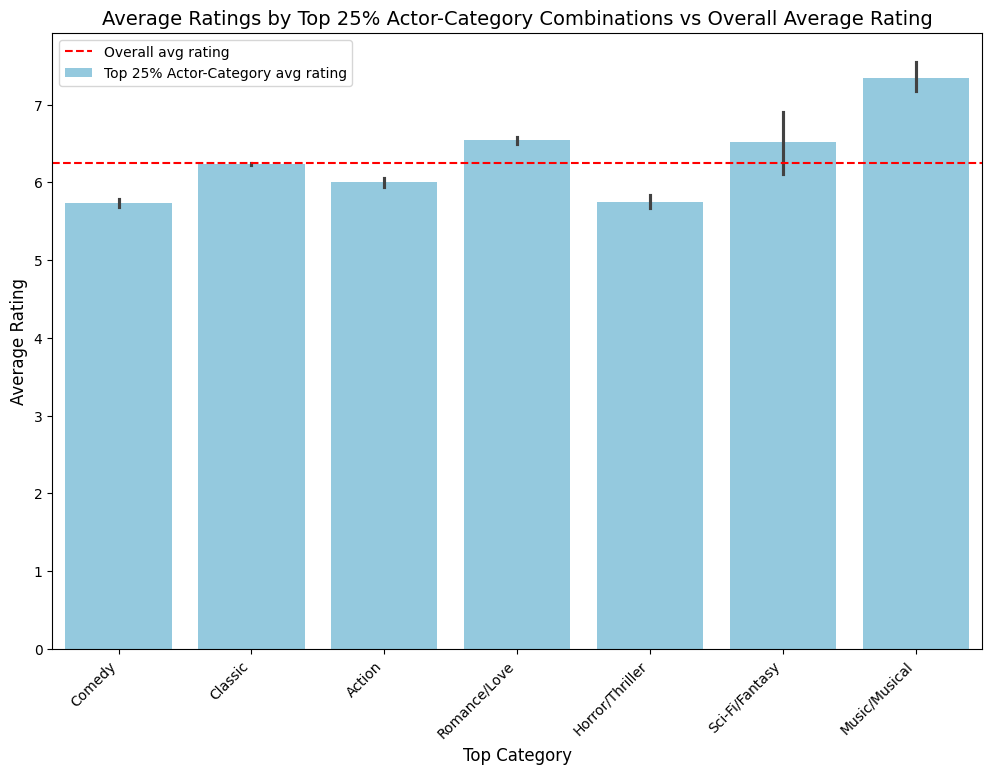

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 'rating_star' 컬럼에서 'unknown'을 제외하고 숫자로 변환
df_deduplicated_2 = df_deduplicated_2[df_deduplicated_2['rating_star'] != 'unknown']
df_deduplicated_2.loc[:, 'rating_star'] = pd.to_numeric(df_deduplicated_2['rating_star'], errors='coerce')

# 1️⃣ actor~top_category 쌍의 등장 횟수 계산
actor_category_counts = df_deduplicated_2.groupby(['actor', 'top_category']).size().reset_index(name='count')

# 2️⃣ 등장 횟수 기준 상위 25%를 필터링
threshold = actor_category_counts['count'].quantile(0.75)  # 상위 25% 기준값
top_25_percent = actor_category_counts[actor_category_counts['count'] >= threshold]

# 3️⃣ rating_star의 평균 계산
# top_25_percent 데이터셋을 원본 데이터(df_deduplicated_2)와 병합하여 rating_star 값 가져오기
top_25_with_ratings = top_25_percent.merge(df_deduplicated_2, on=['actor', 'top_category'], how='left')

# rating_star 컬럼을 숫자로 변환 (unknown 값은 제외)
top_25_with_ratings = top_25_with_ratings[top_25_with_ratings['rating_star'] != 'unknown']
top_25_with_ratings.loc[:, 'rating_star'] = pd.to_numeric(top_25_with_ratings['rating_star'])

# actor~top_category 쌍 별 평균 별점 계산
avg_ratings_top_25 = top_25_with_ratings.groupby(['actor', 'top_category'])['rating_star'].mean().reset_index()

# 전체 평균 평점 계산
overall_avg_rating = df_deduplicated_2['rating_star'].mean()  # 전체 평균 평점

# 바 차트 그리기
plt.figure(figsize=(12, 8))
sns.barplot(x='top_category', y='rating_star', data=avg_ratings_top_25, color='skyblue', label='Top 25% Actor-Category avg rating')
plt.axhline(overall_avg_rating, color='red', linestyle='--', label='Overall avg rating')
plt.xticks(rotation=45, ha='right')
plt.title('Average Ratings by Top 25% Actor-Category Combinations vs Overall Average Rating', fontsize=14)
plt.xlabel('Top Category', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.legend()
plt.show()

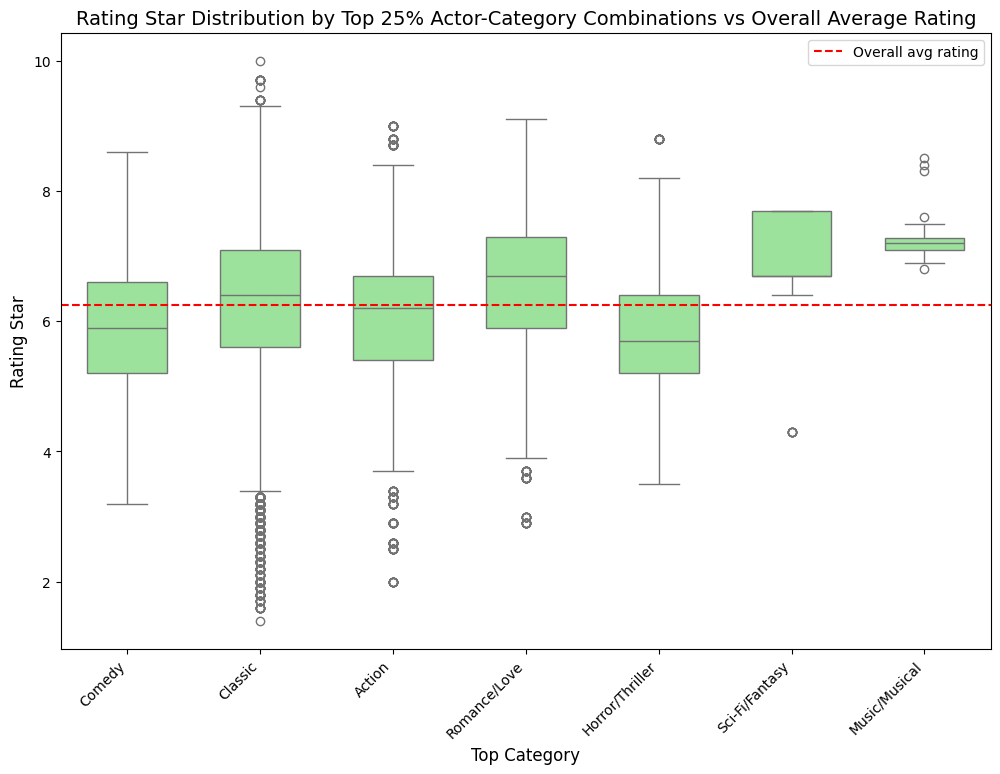

In [35]:
# 박스 플롯: 각 top_category별 상위 25% actor–top_category 쌍의 rating_star 분포 및 전체 평균 평점
plt.figure(figsize=(12, 8))
sns.boxplot(x='top_category', y='rating_star', data=top_25_with_ratings, color='lightgreen', width=0.6)
plt.axhline(overall_avg_rating, color='red', linestyle='--', label='Overall avg rating')
plt.xticks(rotation=45, ha='right')
plt.title('Rating Star Distribution by Top 25% Actor-Category Combinations vs Overall Average Rating', fontsize=14)
plt.xlabel('Top Category', fontsize=12)
plt.ylabel('Rating Star', fontsize=12)
plt.legend()
plt.show()

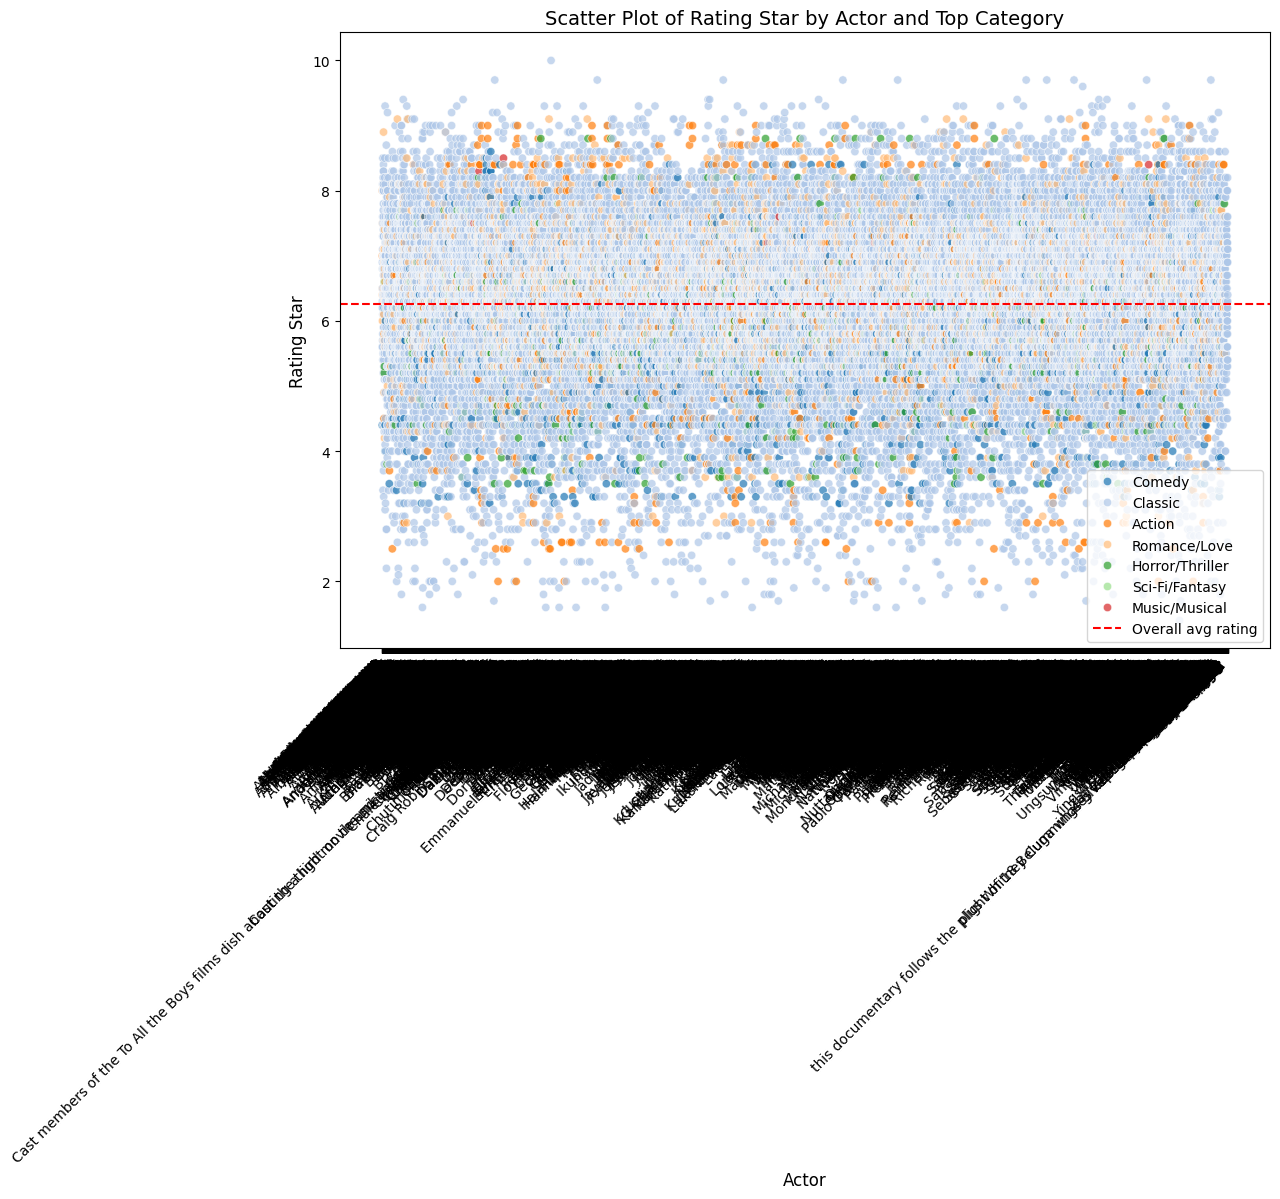

In [37]:
# 1️⃣ actor 컬럼의 문자열 처리: 특수 문자를 제거하거나 안전하게 변경
top_25_with_ratings['actor'] = top_25_with_ratings['actor'].str.replace(r'[^A-Za-z0-9\s]', '', regex=True)

# 2️⃣ 산점도 그리기: actor 이름과 rating_star 값
plt.figure(figsize=(12, 8))
sns.scatterplot(x='actor', y='rating_star', data=top_25_with_ratings, hue='top_category', palette='tab20', alpha=0.7)
plt.axhline(overall_avg_rating, color='red', linestyle='--', label='Overall avg rating')
plt.xticks(rotation=45, ha='right')
plt.title('Scatter Plot of Rating Star by Actor and Top Category', fontsize=14)
plt.xlabel('Actor', fontsize=12)
plt.ylabel('Rating Star', fontsize=12)
plt.legend()
plt.show()